# HR Attrition Rate Analytics

In [1]:
# import libraries
import numpy as np
from numpy import median
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
# Read the file
df = pd.read_csv('HR_Employee_Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Shape of data
df.shape

(1470, 35)

In [4]:
# Data Types of Columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
df.axes

[RangeIndex(start=0, stop=1470, step=1),
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object')]

In [6]:
df.get_dtype_counts()

int64     26
object     9
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Let's check weirdness on the dataset by looking some features

In [9]:
df['TotalWorkingYears'][df['TotalWorkingYears'] < 0].sum()

0

In [10]:
df['MaritalStatus'].unique()
#Marital status has really three unique values as shown on chart above.

array(['Single', 'Married', 'Divorced'], dtype=object)

In [11]:
df['YearsAtCompany'][df['YearsAtCompany'] > 41].sum()
#Checked if there is a weird number for 'YearsAtCompany'. At most, one should have 40 years in a company.

0

In [12]:
# Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
# Reassign response variable
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [14]:
# Inspect useless features
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [15]:
# Drop useless features.
df2 = df.drop(labels = ['Over18','StandardHours','EmployeeCount'], axis = 1)

In [16]:
# Moving Response Variable to the last column
front = df2['Attrition']
df2.drop(labels=['Attrition'], axis=1,inplace=True)
df2.insert(31,'Attrition',front)
df2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,4,1,6,3,3,2,2,2,2,0


In [17]:
# Changing object types to categories
cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in cols:
    df2[col] = df2[col].astype('category')

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null category
DailyRate                   1470 non-null int64
Department                  1470 non-null category
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null category
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null category
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null category
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null category
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompanie

# Inspect values of categorical columns

In [19]:
df2[cols].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [20]:
for col in cols:
    display(df2[col].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

No     1054
Yes     416
Name: OverTime, dtype: int64

# Exploratory Data Analysis

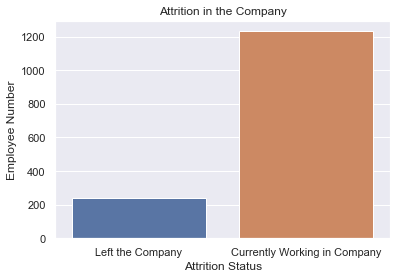

Currently Working in Company    1233
Left the Company                 237
Name: Attrition, dtype: int64

In [21]:
trgt = df2['Attrition'].apply(lambda x: 'Currently Working in Company' if x == 0 else 'Left the Company')
sns.countplot(trgt)
plt.title('Attrition in the Company')
plt.xlabel('Attrition Status')
plt.ylabel('Employee Number')
plt.show()
trgt.value_counts()

16% of the total number of employee left the company for some reasons.

In [22]:
# Create Feature Dataframe
def table_df(x): 
    """
    This function creates dataframe for each feature in the dataset
    """
    
    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee ', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    feature['% of Attrition in the Company'] = (feature['Attrition Number'] / 237)*100
        
    return feature

In [23]:
# Create graph for each feature to compare its attrition in the company 

def graph_df(x, y = 'bar', z = 0):
    """
    This function creates graph for each feature in the dataset
    """
    
    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    
    fig0, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    feature.set_index(feature[x], drop=True, inplace=True)
    feature['Total Employee'].plot(kind = y, stacked = True, ax = ax1, 
                                   colormap = 'winter', rot = z)
    feature['% of Attrition in the Relevant Group'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')
    plt.title('Attrition compared to' + " " + x  + " " + "Groups")
    ax1.set_xlabel(x)
    ax1.yaxis.label.set_color('blue')
    ax1.set_ylabel("Total Employee")
    ax2.set_ylabel("Attrition Percentage in the Relevant Group")
    ax2.yaxis.label.set_color('red')
    plt.tight_layout()
    plt.show()

In [24]:
# Labeling age groups
table_df(x = 'Age')
bins = [17, 21, 25, 35, 60]
group_names = ['(18-21)', '(22-25)', '(26-35)', '(36-60)']
df2['Age'] = pd.cut(df2['Age'], bins, labels = group_names)

In [25]:
# Age Group & Attrition Table
table_df(x = 'Age')

,Age,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,(18-21),41,22,53.658537,9.282700
1,(22-25),82,22,26.829268,9.282700
2,(26-35),606,116,19.141914,48.945148
3,(36-60),741,77,10.391363,32.489451


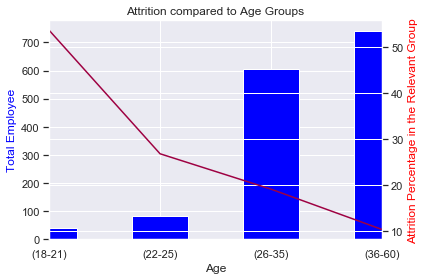

In [26]:
# Attrition Compared to Age Group Graph
graph_df(x = 'Age')

In [27]:
# Business Travel & Attrition Table
table_df(x = 'BusinessTravel')

,BusinessTravel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Non-Travel,150,12,8.000000,5.063291
1,Travel_Frequently,277,69,24.909747,29.113924
2,Travel_Rarely,1043,156,14.956855,65.822785


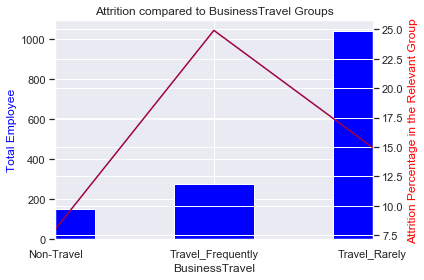

In [28]:
# Attrition compared to Business Travel Group Graph
graph_df(x = 'BusinessTravel')

In [29]:
# Department & Attrition Table
table_df(x = 'Department')

,Department,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,63,12,19.047619,5.063291
1,Research & Development,961,133,13.839750,56.118143
2,Sales,446,92,20.627803,38.818565


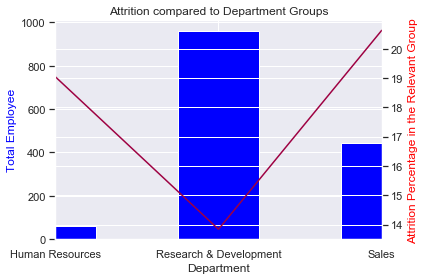

In [30]:
# Attrition compared to Department Graph
graph_df(x = 'Department')

In [31]:
# Labeling Distance From Home Groups
table_df(x = 'DistanceFromHome')
bins = [0, 3, 6, 10, 29]
group_names = ['1-3', '4-6', '7-10', '10+']
df2['DistanceFromHome'] = pd.cut(df2['DistanceFromHome'], bins, labels = group_names)

In [32]:
# Distance From Home Group & Attrition Table
table_df(x = 'DistanceFromHome')

,DistanceFromHome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1-3,503,68,13.518887,28.691983
1,4-6,188,26,13.829787,10.970464
2,7-10,335,50,14.925373,21.097046
3,10+,444,93,20.945946,39.240506


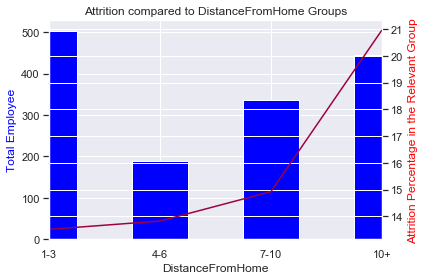

In [33]:
# Attrition compared to Distance From Home Graph
graph_df(x = 'DistanceFromHome')

In [34]:
# Labeling education levels
table_df(x = 'Education')
df2['Education'] = df2['Education'].map({1:'Below College', 2:'College', 
                                         3:'Bachelor', 4:'Master', 5:'Doctor'})

In [35]:
# Education Level & Attrition Table
table_df(x = 'Education')

,Education,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Bachelor,572,99,17.307692,41.772152
1,Below College,170,31,18.235294,13.080169
2,College,282,44,15.602837,18.565401
3,Doctor,48,5,10.416667,2.109705
4,Master,398,58,14.572864,24.472574


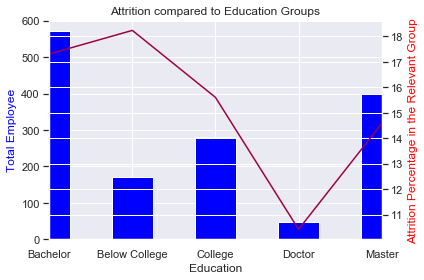

In [36]:
# Attrition compared to Education Level Graph
graph_df(x = 'Education')

In [37]:
# Education Field & Attrition Table
table_df(x = 'EducationField')

,EducationField,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,27,7,25.925926,2.953586
1,Life Sciences,606,89,14.686469,37.552743
2,Marketing,159,35,22.012579,14.767932
3,Medical,464,63,13.577586,26.582278
4,Other,82,11,13.414634,4.641350
5,Technical Degree,132,32,24.242424,13.502110


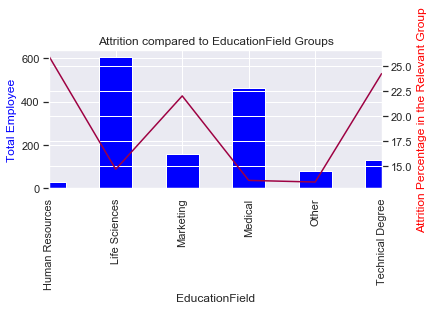

In [38]:
# Attrition compared to Education Field Graph
graph_df(x = 'EducationField', z = 90)

In [39]:
# Labeling environment satisfaction
table_df(x = 'EnvironmentSatisfaction')
df2['EnvironmentSatisfaction'] = df2['EnvironmentSatisfaction'].map({1:'Low', 2:'Medium', 
                                                                     3:'High', 4:'Very High'})

In [40]:
# Environment & Attrition Table
table_df(x = 'EnvironmentSatisfaction')

,EnvironmentSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,453,62,13.686534,26.160338
1,Low,284,72,25.352113,30.379747
2,Medium,287,43,14.982578,18.143460
3,Very High,446,60,13.452915,25.316456


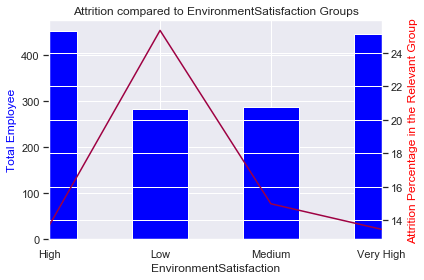

In [41]:
# Attrition compared to Environment Satisfaction Graph
graph_df(x = 'EnvironmentSatisfaction')

In [42]:
# Gender & Attrition Table
table_df(x = 'Gender')

,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,588,87,14.795918,36.708861
1,Male,882,150,17.006803,63.291139


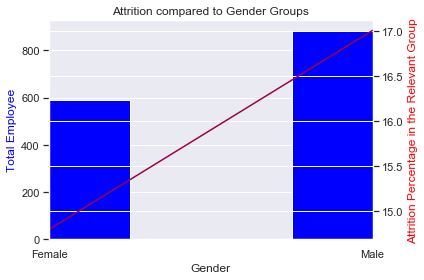

In [43]:
# Attrition compared to Gender Graph
graph_df(x = 'Gender')

In [44]:
# Labeling Job Involvement Groups
table_df(x = 'JobInvolvement')
df2['JobInvolvement'] = df2['JobInvolvement'].map({1:'Low', 2:'Medium', 
                                                   3:'High', 4:'Very High'})

In [45]:
# Job Involvement & Attrition Table
table_df(x = 'JobInvolvement')

,JobInvolvement,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,868,125,14.400922,52.742616
1,Low,83,28,33.734940,11.814346
2,Medium,375,71,18.933333,29.957806
3,Very High,144,13,9.027778,5.485232


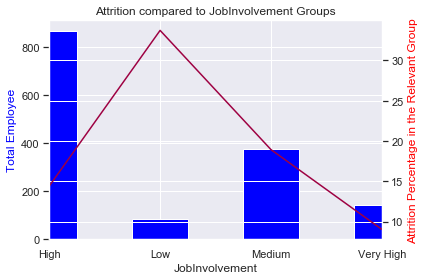

In [46]:
# Attrition compared to Job Involvement Graph
graph_df(x = 'JobInvolvement')

In [47]:
# Labeling job levels
table_df(x = 'JobLevel')
df2['JobLevel'] = df2['JobLevel'].map({1:'Level-1', 2:'Level-2', 
                                       3:'Level-3', 4:'Level-4', 5:'Level-5'})

In [48]:
# Job Level & Attrition Table
table_df(x = 'JobLevel')

,JobLevel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Level-1,543,143,26.335175,60.337553
1,Level-2,534,52,9.737828,21.940928
2,Level-3,218,32,14.678899,13.502110
3,Level-4,106,5,4.716981,2.109705
4,Level-5,69,5,7.246377,2.109705


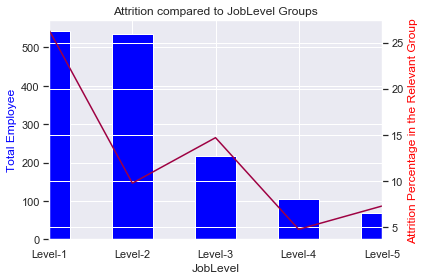

In [49]:
# Attrition compared to Job Level Graph
graph_df(x = 'JobLevel')

In [50]:
# Job Role & Attrition Table
table_df(x = 'JobRole')

,JobRole,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Healthcare Representative,131,9,6.870229,3.797468
1,Human Resources,52,12,23.076923,5.063291
2,Laboratory Technician,259,62,23.938224,26.160338
3,Manager,102,5,4.901961,2.109705
4,Manufacturing Director,145,10,6.896552,4.219409
5,Research Director,80,2,2.500000,0.843882
6,Research Scientist,292,47,16.095890,19.831224
7,Sales Executive,326,57,17.484663,24.050633
8,Sales Representative,83,33,39.759036,13.924051


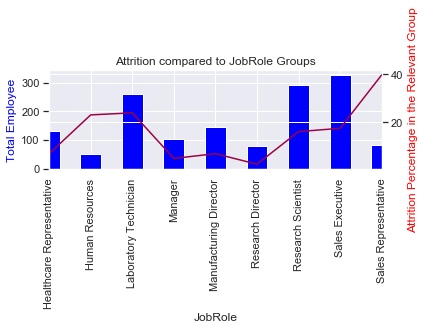

In [51]:
# Attrition compared to Job Role Graph
graph_df(x = 'JobRole', z = 90)

Sales Representative role has been affected mostly by the attrition. Sales Representative has lost approximately 40% of its' employee. Laboratory Technician and Human Resources followed it in terms of losing employee as a job role.

In [52]:
# Labeling Job Satisfaction 
table_df(x = 'JobSatisfaction')
df2['JobSatisfaction'] = df2['JobSatisfaction'].map({1:'Low', 2:'Medium',
                                                     3:'High', 4:'Very High'})

In [53]:
# Job Satisfaction & Attrition Table
table_df(x = 'JobSatisfaction')

,JobSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,442,73,16.515837,30.801688
1,Low,289,66,22.837370,27.848101
2,Medium,280,46,16.428571,19.409283
3,Very High,459,52,11.328976,21.940928


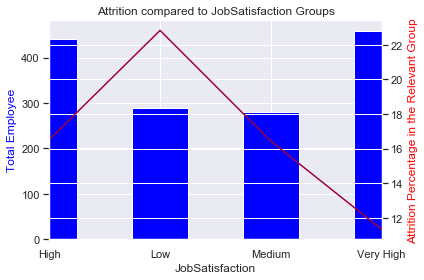

In [54]:
# Attrition compared to Job Satisfaction
graph_df(x = 'JobSatisfaction')

As it may be expected, in low job satisfaction, employees leave the company more than other groups except high satisfaction. They compose 27.8% of all attrition in the company.

In [55]:
#Marital Status & Attrition Table
table_df(x = 'MaritalStatus')

,MaritalStatus,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Divorced,327,33,10.091743,13.924051
1,Married,673,84,12.481426,35.443038
2,Single,470,120,25.531915,50.632911


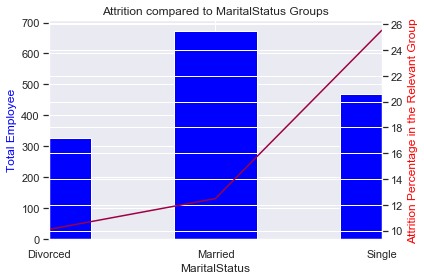

In [65]:
# Attrition compared to Marital Status
graph_df(x = 'MaritalStatus')

Single employees are more likely to leave the company. They have the highest attrition number and compose of the 50.6% employees who left the company.

In [57]:
# Labeling Monthly Income Level
table_df(x = "MonthlyIncome")
bins = [1000, 2000, 3000, 4000, 5000, 7500, 9000, 11000, 15000, 20000]
group_names = ['1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-7500', 
               '7500-9000', '9000-11000', '11000-15000', '15000-20000']             
df2["MonthlyIncome"] = pd.cut(df2["MonthlyIncome"], bins, labels = group_names)

In [58]:
# Monthly Income & Attrition Table
table_df(x = "MonthlyIncome")

,MonthlyIncome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1000-2000,33,18,54.545455,7.594937
1,2000-3000,362,95,26.243094,40.084388
2,3000-4000,148,24,16.216216,10.126582
3,4000-5000,206,26,12.621359,10.970464
4,5000-7500,310,30,9.677419,12.658228
5,7500-9000,78,10,12.820513,4.219409
6,9000-11000,118,22,18.644068,9.282700
7,11000-15000,82,7,8.536585,2.953586
8,15000-20000,133,5,3.759398,2.109705


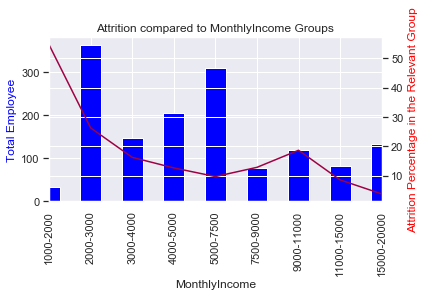

In [59]:
# Attrition compared to Monthly Income Level Graph
graph_df(x = "MonthlyIncome", z = 90)

1000-2000 dollars monthly income level, there is a high attrition in its own income group level, which is 54.5%.

In [60]:
# Labeling Numbers Companied Worked Groups
table_df(x = 'NumCompaniesWorked')
bins = [0, 1, 2, 3, 4, 5, 10]
group_names = ['0', '1', '2', '3', '4', '5+']             
df2['NumCompaniesWorked'] = pd.cut(df2['NumCompaniesWorked'], bins, labels = group_names, 
                                        include_lowest = True, right = False)

In [61]:
# Numbers Companied Worked & Attrition Table
table_df(x = 'NumCompaniesWorked')

,NumCompaniesWorked,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,197,23,11.675127,9.704641
1,1,521,98,18.809981,41.350211
2,2,146,16,10.958904,6.751055
3,3,159,16,10.062893,6.751055
4,4,139,17,12.230216,7.172996
5,5+,308,67,21.753247,28.270042


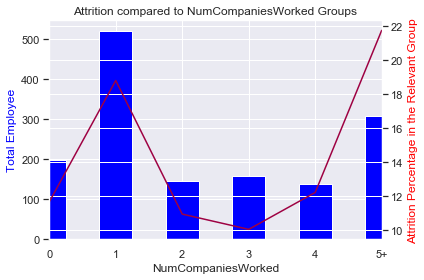

In [62]:
# Attrition compared to Numbers of Companies Worked Graph
graph_df(x = 'NumCompaniesWorked')

If employees have one company experience before current company, they are more likely to leave the company. They have the highest attrition number and compose of 41.3% all attrition in the company. 

In [63]:
# Overtime Worked & Attrition Table
table_df(x = 'OverTime')

,OverTime,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,No,1054,110,10.436433,46.413502
1,Yes,416,127,30.528846,53.586498


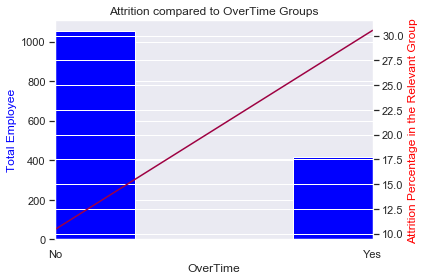

In [64]:
# Attrition compared to OverTime Worked Graph
graph_df(x = 'OverTime')

Over time employees are much more likely to leave the company.

In [66]:
# Percent Salary Hike & Attrition Table
table_df(x = 'PercentSalaryHike')
bins = [10, 14, 18, 22, 25]
group_names = ['11-14', '15-18', '19-22', '23-25']             
df2['PercentSalaryHike'] = pd.cut(df2['PercentSalaryHike'], bins, labels = group_names)

In [67]:
# Percent Salary Hike & Attrition Table
table_df(x = 'PercentSalaryHike')

,PercentSalaryHike,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,11-14,818,132,16.136919,55.696203
1,15-18,350,59,16.857143,24.894515
2,19-22,235,33,14.042553,13.924051
3,23-25,67,13,19.402985,5.485232


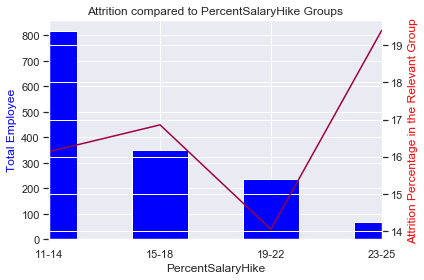

In [68]:
# Attrition compared to Percent Salary Hike
graph_df(x = 'PercentSalaryHike')

In [69]:
# Performance Rating & Attrition Table
table_df(x = 'PerformanceRating')

,PerformanceRating,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,3,1244,200,16.077170,84.388186
1,4,226,37,16.371681,15.611814


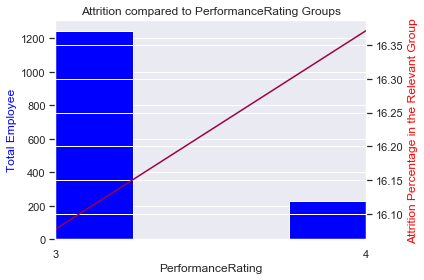

In [70]:
# Attrition compared to Performance Rating
graph_df(x = 'PerformanceRating')

In [71]:
# Labeling Relationship Satisfaction Levels
table_df(x = 'RelationshipSatisfaction')
df2['RelationshipSatisfaction'] = df2['RelationshipSatisfaction'].map({1:'Low', 2:'Medium', 
                                                                       3:'High', 4:'Very High'})

In [72]:
# Relationship & Attrition Table
table_df(x = 'RelationshipSatisfaction')

,RelationshipSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,459,71,15.468410,29.957806
1,Low,276,57,20.652174,24.050633
2,Medium,303,45,14.851485,18.987342
3,Very High,432,64,14.814815,27.004219


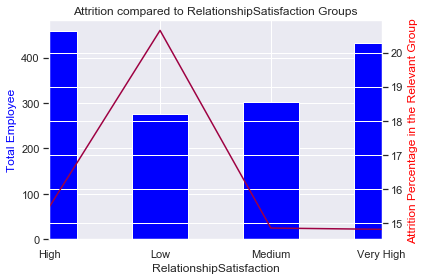

In [73]:
# Attrition compared to Relationship Satisfaction Graph
graph_df(x = 'RelationshipSatisfaction')

In [74]:
# Stock option level & Attrition Table
table_df(x = 'StockOptionLevel')

,StockOptionLevel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,631,154,24.405705,64.978903
1,1,596,56,9.395973,23.628692
2,2,158,12,7.594937,5.063291
3,3,85,15,17.647059,6.329114


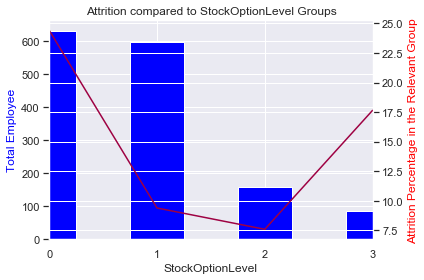

In [75]:
# Attrition compared to Stock Option Level Graph
graph_df(x = 'StockOptionLevel')

In [76]:
# Total Working Years & Attrition Table
table_df(x = 'TotalWorkingYears')
bins = [0, 1, 5, 10, 15, 20, 40]
group_names = ['1', '2-5', '6-10', '11-15', '16-20', '20+']             
df2['TotalWorkingYears'] = pd.cut(df2['TotalWorkingYears'], bins, labels = group_names, 
                                  include_lowest = True)

In [77]:
# Total Working Years & Attrition Table
table_df(x = 'TotalWorkingYears')

,TotalWorkingYears,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,92,45,48.913043,18.987342
1,2-5,224,46,20.535714,19.409283
2,6-10,607,91,14.991763,38.396624
3,11-15,191,24,12.565445,10.126582
4,16-20,149,15,10.067114,6.329114
5,20+,207,16,7.729469,6.751055


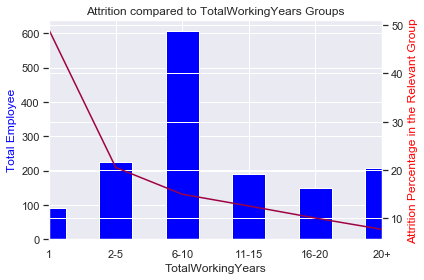

In [78]:
graph_df(x = 'TotalWorkingYears')

Employees who have one year or less working experience are more likely to leave the company and compose the 18.98% of all attrition throughout the company.

In [80]:
# Training Times Last Year & Attrition Table
table_df(x = 'TrainingTimesLastYear')

,TrainingTimesLastYear,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,54,15,27.777778,6.329114
1,1,71,9,12.676056,3.797468
2,2,547,98,17.915905,41.350211
3,3,491,69,14.052953,29.113924
4,4,123,26,21.138211,10.970464
5,5,119,14,11.764706,5.907173
6,6,65,6,9.230769,2.531646


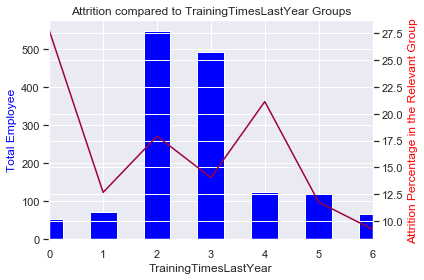

In [81]:
# Attrition compared to Training Times Last Year Graph
graph_df(x = 'TrainingTimesLastYear')

In [82]:
# Labeling Work Life Balance Groups
table_df(x = 'WorkLifeBalance')
df2['WorkLifeBalance'] = df2['WorkLifeBalance'].map({1:'Bad', 2:'Good', 
                                                     3:'Better', 4:'Best'})

In [83]:
# Work Life Balance & Attrition Table
table_df(x = 'WorkLifeBalance')

,WorkLifeBalance,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Bad,80,25,31.250000,10.548523
1,Best,153,27,17.647059,11.392405
2,Better,893,127,14.221725,53.586498
3,Good,344,58,16.860465,24.472574


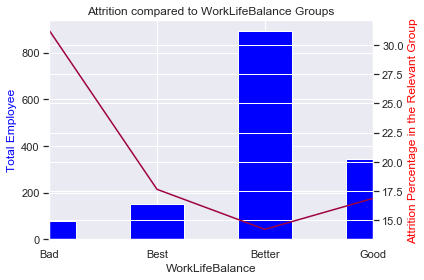

In [84]:
# Attrition compared to Work Life Balance Graph
graph_df(x = 'WorkLifeBalance')

bad work life balance group has highest attrition percentage in its individual group.

In [85]:
# Labeling Years at Company Groups
table_df(x = 'YearsAtCompany')
bins = [0, 1, 5, 10, 40]
group_names = ['1', '2-5', '6-10', '10+']             
df2['YearsAtCompany'] = pd.cut(df2['YearsAtCompany'], bins, labels = group_names, 
                               include_lowest = True)

In [86]:
# Years at Company & Attrition Table
table_df(x = 'YearsAtCompany')

,YearsAtCompany,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,215,75,34.883721,31.645570
1,2-5,561,87,15.508021,36.708861
2,6-10,448,55,12.276786,23.206751
3,10+,246,20,8.130081,8.438819


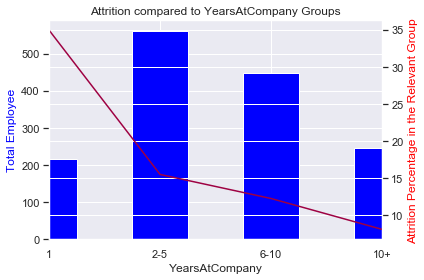

In [87]:
# Years at Company & Attrition Graph 
graph_df(x = 'YearsAtCompany')

Employees who have one year or less working experience in the company has the highest attrition percentage in its individual experience group (34.9% of attrition in the relevant group). Besides that, highest attrition number, which is 87 employees, is in the 2-5 years working experience at the company and that composes of the 36.7 % of all attrition in the company.

In [88]:
# Labeling Years in Current Role Groups
table_df(x = 'YearsInCurrentRole')
bins = [0, 1, 4, 6, 7, 10, 18]
group_names = ['1', '2-4', '5-6', '7', '8-10', '10+']             
df2['YearsInCurrentRole'] = pd.cut(df2['YearsInCurrentRole'], bins, labels = group_names, 
                                   include_lowest = True)

In [89]:
# Years at Company & Attrition Table
table_df(x = 'YearsAtCompany')

,YearsAtCompany,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,215,75,34.883721,31.645570
1,2-5,561,87,15.508021,36.708861
2,6-10,448,55,12.276786,23.206751
3,10+,246,20,8.130081,8.438819


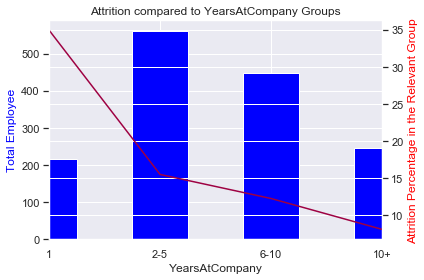

In [90]:
# Years in Current Role & Attrition Graph 
graph_df(x = 'YearsAtCompany')

In [91]:
# Labeling Years in Current Role Groups
table_df(x = 'YearsSinceLastPromotion')
bins = [0, 1, 2, 3, 4, 7, 8, 16]
group_names = ['0', '1', '2', '3', '4-6', '7', '8+']             
df2['YearsSinceLastPromotion'] = pd.cut(df2['YearsSinceLastPromotion'], bins, labels = group_names, 
                                        include_lowest = True, right = False)

In [92]:
# Years Since Last Promotion & Attrition Table
table_df(x = 'YearsSinceLastPromotion')

,YearsSinceLastPromotion,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,581,110,18.932874,46.413502
1,1,357,49,13.725490,20.675105
2,2,159,27,16.981132,11.392405
3,3,52,9,17.307692,3.797468
4,4-6,138,13,9.420290,5.485232
5,7,76,16,21.052632,6.751055
6,8+,107,13,12.149533,5.485232


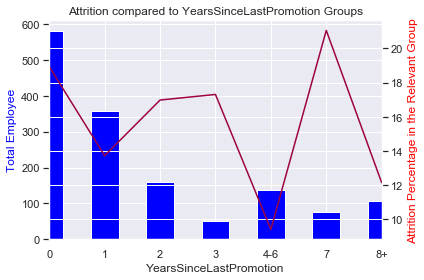

In [93]:
# Years Since Last Promotion & Attrition Graph
graph_df(x = 'YearsSinceLastPromotion')

Employees who don't fulfill his one year since the last promotion in the company are more likely to leave the company(46.4% of all attrition). And employees who have one and two years experience in the current company since the last promotion have the highest attrition number after the above group in the company respectively.

In [94]:
# Labeling Years with Current Manager Groups
table_df(x = 'YearsWithCurrManager')
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 18]
group_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']             
df2['YearsWithCurrManager'] = pd.cut(df2['YearsWithCurrManager'], bins, labels = group_names, 
                                     include_lowest = True, right = False)

In [95]:
# Years with Current Manager & Attrition Table
table_df(x = 'YearsWithCurrManager')

,YearsWithCurrManager,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,263,85,32.319392,35.864979
1,1,76,11,14.473684,4.641350
2,2,344,50,14.534884,21.097046
3,3,142,19,13.380282,8.016878
4,4,98,11,11.224490,4.641350
5,5,31,4,12.903226,1.687764
6,6,29,4,13.793103,1.687764
7,7,216,31,14.351852,13.080169
8,8,107,10,9.345794,4.219409
9,9,64,6,9.375000,2.531646


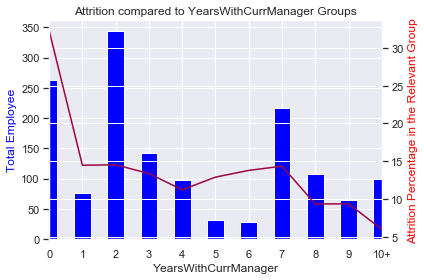

In [96]:
# Years with Current Manager & Attrition Graph
graph_df(x = 'YearsWithCurrManager')

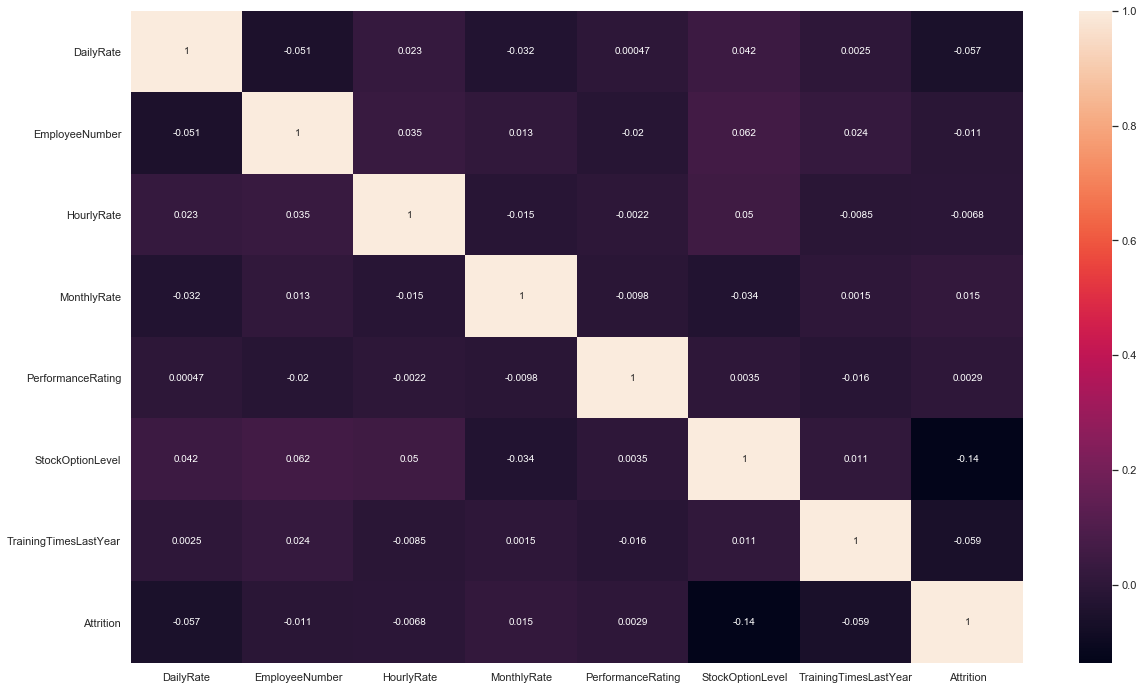

In [97]:
corr_matrix = df2.corr()
f , ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix, vmax=1, annot=True)

In [98]:
df2.drop(['EmployeeNumber', 'PerformanceRating'], axis = 1, inplace = True)

In [99]:
# Extract categorical features from dataset
cat_df = df2.select_dtypes(include='category')
cat_df.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [100]:
num_df = df2.select_dtypes(include='int64')
num_df.columns

Index(['DailyRate', 'HourlyRate', 'MonthlyRate', 'StockOptionLevel',
       'TrainingTimesLastYear', 'Attrition'],
      dtype='object')

In [101]:
# One hot encode categorical dataframe
features_categorical = pd.get_dummies(cat_df, drop_first=True)
features_categorical.head()

,Age_(22-25),Age_(26-35),Age_(36-60),BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,DistanceFromHome_4-6,DistanceFromHome_7-10,DistanceFromHome_10+,...,YearsWithCurrManager_1,YearsWithCurrManager_2,YearsWithCurrManager_3,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10+
0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [102]:
# concatenate the features
df3 = pd.concat([num_df, features_categorical], axis=1)
df3.head()

,DailyRate,HourlyRate,MonthlyRate,StockOptionLevel,TrainingTimesLastYear,Attrition,Age_(22-25),Age_(26-35),Age_(36-60),BusinessTravel_Travel_Frequently,...,YearsWithCurrManager_1,YearsWithCurrManager_2,YearsWithCurrManager_3,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10+
0,1102,94,19479,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,279,61,24907,1,3,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,1373,92,2396,0,3,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1392,56,23159,0,3,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,591,40,16632,1,3,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [103]:
# Moving Response Variable to the last column
response = df3['Attrition']
df3 = df3.drop(labels=['Attrition'], axis=1)
df3.insert(43,'Attrition',response)
df3.head()

,DailyRate,HourlyRate,MonthlyRate,StockOptionLevel,TrainingTimesLastYear,Age_(22-25),Age_(26-35),Age_(36-60),BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,YearsWithCurrManager_1,YearsWithCurrManager_2,YearsWithCurrManager_3,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10+
0,1102,94,19479,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,279,61,24907,1,3,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1373,92,2396,0,3,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1392,56,23159,0,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,591,40,16632,1,3,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


# Machine Learning

In [108]:
# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Imputer, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from scipy.stats import randint
from sklearn.model_selection import train_test_split

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold

# Import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [104]:
X = df3.iloc[:, :-1].values   
y = df3.iloc[:, 43].values

In [109]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [110]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [111]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.06716397, 0.05255915, 0.04363517, 0.03408109, 0.02861953,
       0.02714799, 0.02411208, 0.02217053, 0.02196338, 0.02081638,
       0.02000233, 0.01939305, 0.01907713, 0.01865188, 0.01825316,
       0.01801606, 0.01740879, 0.01721438, 0.01711181, 0.01662218,
       0.01638982, 0.0157111 , 0.01553846, 0.01541156, 0.01529754,
       0.01510364, 0.01463479, 0.01436765, 0.01415463, 0.01388659,
       0.01358356, 0.01344131, 0.01328976, 0.01275026, 0.0124993 ,
       0.01245266, 0.01231735, 0.01224278, 0.01191094, 0.01164554,
       0.011576  , 0.01141189, 0.01099257, 0.01077607, 0.01043918,
       0.01005615, 0.00986514, 0.0095306 , 0.00927851, 0.00915635,
       0.00885378, 0.00821048, 0.0081149 , 0.00770354, 0.00757446,
       0.00703352, 0.00639796, 0.00630881, 0.00539183, 0.00456083,
       0.00409324, 0.00385875, 0.00307525, 0.00279478, 0.00255028,
       0.00244713, 0.00179435, 0.00134479, 0.00121452, 0.00071916,
       0.00052661, 0.00042676, 0.00038546, 0.00031853, 0.00029

In [112]:
def classification_all_features(Model):
    """
    This function apply machine learning algorithms into the all features in the dataset and 
    returns confusion matrix and f1 score which will be used in models comparison.
    """
    
    X = df3.iloc[:, :-1].values   
    y = df3.iloc[:, 43].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    # Feature Scaling
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    
    global score
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    print("f1 score: {}".format(score))
    
    print(confusion_matrix(y_test, y_pred))

In [121]:
def classification_tuning_all(regularizator):
    """
    This function apply hyperparameter tuning to machine learning algorithms with all features and 
    returns best parameters, confusion matrix and f1 score which will be used in models comparison.
    """
    X = df3.iloc[:, :-1].values   
    y = df3.iloc[:, 43].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    # Hyperparameter with regularizator
    model_cv = regularizator
    
    # Fitting classifier to the Training set (all features)
    model_cv.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = model_cv.predict(X_test)

    global score 
    # Assign f1 score to a variable
    score = model_cv.score(X_test, y_test)

    print("f1 score: {}".format(score))

    print("Tuned Model Parameters: {}".format(model_cv.best_params_))

    print(confusion_matrix(y_test, y_pred))

In [114]:
def classification_pca_features(Model):
    """
    This function apply machine learning algorithms into the all PCA features and 
    returns confusion matrix and f1 score which will be used in models comparison.
    """
    X = df3.iloc[:, :-1].values   
    y = df3.iloc[:, 43].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    # Extracting 27 features from PCA
    pca = PCA(n_components = 27)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(X_train_pca, y_train)
    
    # Predicting the Test set results
    y_pred = model.predict(X_test_pca)
    
    global score
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    print("f1 score: {}".format(score))
    
    print(confusion_matrix(y_test, y_pred))

In [115]:
def classification_tuning_pca(regularizator):   
    """
    This function apply hyperparameter tuning to machine learning algorithms with pca features and 
    returns best parameters, confusion matrix and f1 score which will be used in models comparison.
    """
    X = df3.iloc[:, :-1].values   
    y = df3.iloc[:, 43].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    # Feature Scaling
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    # Extracting 27 features from PCA
    pca = PCA(n_components = 27)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Hyperparameter with regularizator
    model_cv = regularizator
    
    # Fitting classifier to the Training set (all features)
    model_cv.fit(X_train_pca, y_train)

    # Predicting the Test set results
    y_pred = model_cv.predict(X_test_pca)
    
    global score 
    # Assign f1 score to a variable
    score = model_cv.score(X_test_pca, y_test)

    print("f1 score: {}".format(score))

    print("Tuned Model Parameters: {}".format(model_cv.best_params_))

    print(confusion_matrix(y_test, y_pred))

In [116]:
# Function for logistic regression with all features
classification_all_features(LogisticRegression(random_state = 0))

f1 score: 1.0
[[310   0]
 [  0  58]]


In [117]:
# Assign f1 score to a variable for the model comparison 
lrg1 = score

Logistic Regression with Hyperparameter Tuning (all features)

In [122]:
param_grid = {'C': np.arange(1, 1000)}

# Function for hyperparameter tuning to logistic regression with all features
classification_tuning_all(GridSearchCV(LogisticRegression(random_state = 0), 
                                       param_grid, cv=5, scoring = 'f1_weighted'))

f1 score: 1.0
Tuned Model Parameters: {'C': 1}
[[310   0]
 [  0  58]]


In [123]:
lrg2 = score

Logistic Regression with PCA features

In [124]:
# Function for logistic regression with PCA features
classification_pca_features(LogisticRegression(random_state = 0))

f1 score: 0.9499873719834825
[[304   6]
 [ 12  46]]


In [125]:
lrg3 = score

Logistic Regression with Hyperparameter Tuning (PCA features)

In [126]:
# Set up parameters
param_grid={'C': np.arange(1, 1000)}

# Functions for tuning logistic regression with pca features
classification_tuning_pca(GridSearchCV(LogisticRegression(random_state = 0), 
                                       param_grid, cv = 5, scoring = 'f1_weighted'))

f1 score: 0.9601228779475889
Tuned Model Parameters: {'C': 1}
[[309   1]
 [ 13  45]]


In [127]:
lrg4 = score

# Decision Tree Classification

Decision Tree Classification with all features

In [128]:
# Function for decision tree classification model with all features
classification_all_features(DecisionTreeClassifier(criterion = 'gini', random_state = 0))

f1 score: 1.0
[[310   0]
 [  0  58]]


In [129]:
dtr1 = score

Decision Tree Classification with Hyperparameter Tuning (all features)

In [130]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": np.linspace(1, 32, 32, endpoint=True),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Function for hyperparameter tuning to decision tree classification with all features
classification_tuning_all(RandomizedSearchCV(DecisionTreeClassifier(random_state = 0), 
                                             param_dist, cv=5, scoring = 'f1_weighted'))

f1 score: 1.0
Tuned Model Parameters: {'criterion': 'gini', 'max_depth': 3.0, 'min_samples_leaf': 8}
[[310   0]
 [  0  58]]


In [131]:
dtr2 = score

Decision Tree Classification with PCA features

In [132]:
# Function for decision tree classification with PCA features
classification_pca_features(DecisionTreeClassifier())

f1 score: 0.8391445511010728
[[278  32]
 [ 28  30]]


In [133]:
dtr3 = score

Decision Tree with Hyperparameter Tuning (PCA features)

In [134]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": np.linspace(1, 32, 32, endpoint = True),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Functions for tuning decision trees with pca features
classification_tuning_pca(RandomizedSearchCV(DecisionTreeClassifier(), 
                                             param_dist, cv = 5, scoring = 'f1_weighted', random_state = 0))

f1 score: 0.8434255489054007
Tuned Model Parameters: {'criterion': 'gini', 'max_depth': 25.0, 'min_samples_leaf': 5}
[[283  27]
 [ 30  28]]


In [135]:
dtr4 = score

In [136]:
# Dictionary of model f1 scores to compare
results={'Logistic Regression': [lrg1, lrg2, lrg3, lrg4], 
         'Decision Tree': [dtr1, dtr2, dtr3, dtr4]}

In [138]:
#Creating model comparison dataframe
comparison = pd.DataFrame.from_dict(results, orient='index')
comparison.columns = ['all_features', 'tuned_all_features', 'PCA_features', 'tuned_PCA_features']

In [140]:
# Computing the total improvement on the f1 score

list1 = []
for i in comparison.index:
    d = max(comparison.all_features[i], comparison.tuned_all_features[i], comparison.PCA_features[i], comparison.tuned_PCA_features[i])
    e = (d / comparison.all_features[i]) - 1
    list1.append(float("%.4f" % e))

comparison['Total Improvement(%)'] = list1
comparison

,all_features,tuned_all_features,PCA_features,tuned_PCA_features,Total Improvement(%)
Logistic Regression,1.0,1.0,0.949987,0.960123,0.0
Decision Tree,1.0,1.0,0.839145,0.843426,0.0
